In [2]:
import matplotlib.pyplot as plt

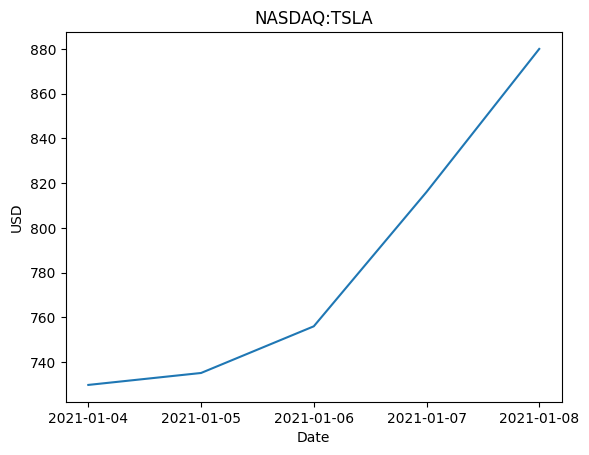

In [3]:
days = ['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
prices = [729.77, 735.11, 755.98, 816.04, 880.02]
 
plt.plot(days, prices)
plt.title('NASDAQ:TSLA')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

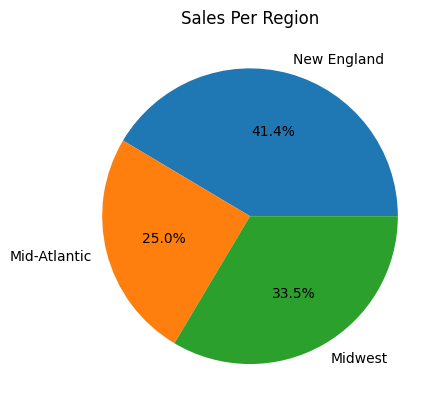

In [4]:
regions = ['New England', 'Mid-Atlantic', 'Midwest']
sales = [882703, 532648, 714406]

plt.pie(sales, labels=regions, autopct='%1.1f%%')
plt.title('Sales Per Region')
plt.show()

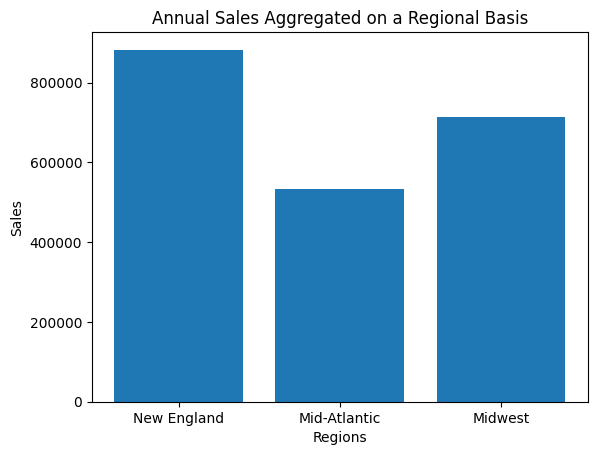

In [5]:
plt.bar(regions, sales)
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.title("Annual Sales Aggregated on a Regional Basis")
plt.show()

## Creating a histogram with subplots()

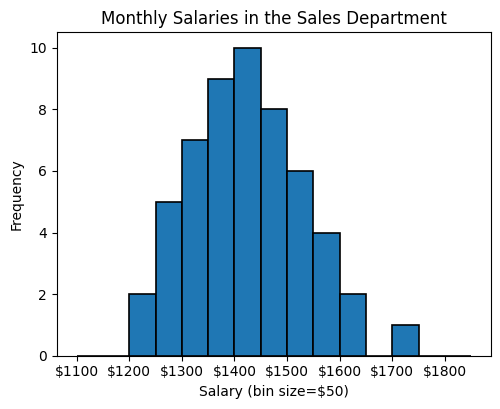

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# data to plot
salaries = [1215, 1221, 1263, 1267, 1271, 1274, 
            1275, 1318, 1320, 1324, 1324, 1326, 
            1337, 1346, 1354, 1355, 1364, 1367, 
            1372, 1375, 1376, 1378, 1378, 1410, 
            1415, 1415, 1418, 1420, 1422, 1426, 
            1430, 1434, 1437, 1451, 1454, 1467, 
            1470, 1473, 1477, 1479, 1480, 1514, 
            1516, 1522, 1529, 1544, 1547, 1554, 
            1562, 1584, 1595, 1616, 1626, 1717]

fig, ax = plt.subplots()
fig.set_size_inches(5.6, 4.2)
ax.hist(salaries, 
        bins=np.arange(1100,1900,50), 
        edgecolor='black',
        linewidth=1.2)
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(formatter)
plt.title("Monthly Salaries in the Sales Department")
plt.xlabel("Salary (bin size=$50)")
plt.ylabel("Frequency")
plt.show()

## Showing frequency distributions on a pie chart

In [31]:
# create a histogram using binning, but return only the counts and bin labels
count, labels = np.histogram(salaries, bins=np.arange(1100,1900,50))
print(count)

[ 0  0  2  5  7  9 10  8  6  4  2  0  1  0  0]


In [32]:
# change the labesl to be a range value with $ sign
labels = ['$'+str(labels[i])+'-'+str(labels[i+1]) for i, _ in enumerate(labels[1:])]

In [33]:
print(labels)

['$1100-1150', '$1150-1200', '$1200-1250', '$1250-1300', '$1300-1350', '$1350-1400', '$1400-1450', '$1450-1500', '$1500-1550', '$1550-1600', '$1600-1650', '$1650-1700', '$1700-1750', '$1750-1800', '$1800-1850']


In [34]:
# return only the counts that were not zero
non_zero_pos = [i for i, x in enumerate(count) if x!=0]

In [35]:
non_zero_pos

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12]

In [37]:
# filter the labels to only include the same matching non_zero_pos index values
labels = [e for i, e in enumerate(labels) if i in non_zero_pos]
count = [e for i, e in enumerate(count) if i in non_zero_pos]

In [38]:
labels

['$1200-1250',
 '$1250-1300',
 '$1300-1350',
 '$1350-1400',
 '$1400-1450',
 '$1450-1500',
 '$1500-1550',
 '$1550-1600',
 '$1600-1650',
 '$1700-1750']

In [39]:
count

[2, 5, 7, 9, 10, 8, 6, 4, 2, 1]

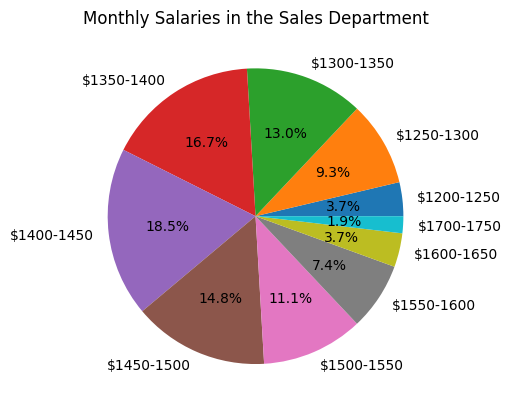

In [40]:
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Monthly Salaries in the Sales Department')
plt.show()

## Plotting pandas data

In [42]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

In [43]:
us_cities.head(3)

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361


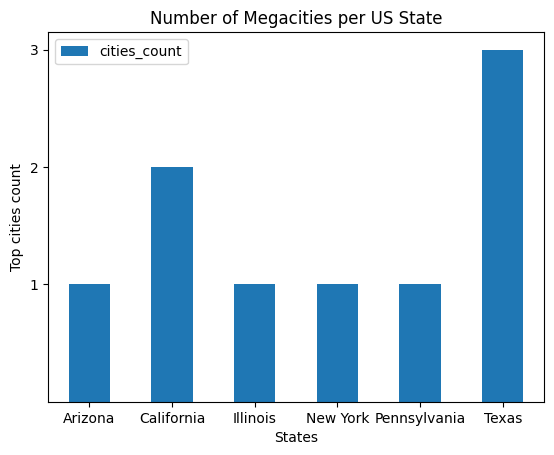

In [53]:
# "ge" is for greater than or equal to
top_us_cities = us_cities[us_cities["Population"].ge(1000000)]
top_cities_count = top_us_cities.groupby(['State'], as_index=False) \
                                .count() \
                                .rename(columns={'City':'cities_count'}) \
                                [['State','cities_count']]
top_cities_count.plot.bar('State','cities_count',rot=0)     
plt.xlabel("States")
plt.ylabel("Top cities count")
plt.title("Number of Megacities per US State")
plt.yticks(range(min(top_cities_count['cities_count']),
                 max(top_cities_count['cities_count'])+1))
plt.show()

In [52]:
top_cities_count

,State,cities_count
0,Arizona,1
1,California,2
2,Illinois,1
3,New York,1
4,Pennsylvania,1
5,Texas,3


## PLotting geospatial with Cartopy

In [55]:
import pandas as pd
import matplotlib.pyplot
%matplotlib inline
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [56]:
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
us_cities.head(3)

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361


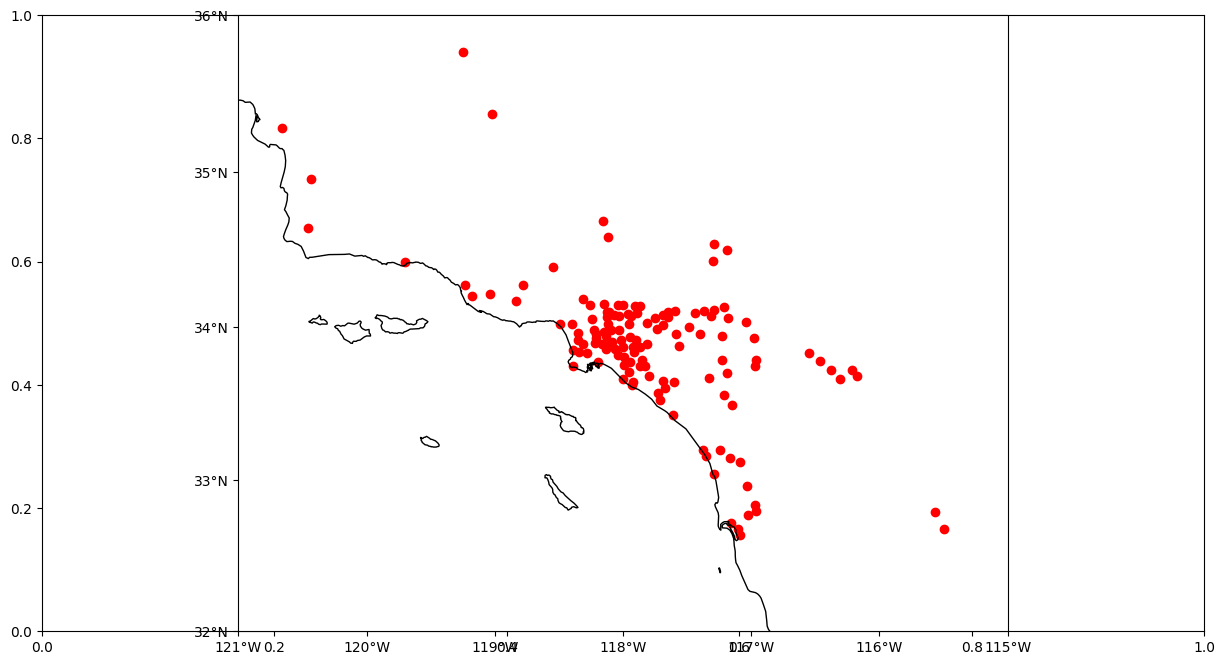

In [61]:
calif_cities = us_cities[us_cities["State"].eq('California')]
fig, ax = plt.subplots(figsize=(15,8))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')
ax.set_yticks([32,33,34,35,36], crs=ccrs.PlateCarree())
ax.set_xticks([-121,-120,-119,-118,-117,-116,-115], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-121,-115,32,36], crs=ccrs.PlateCarree())
X = calif_cities['lon']
Y = calif_cities['lat']
ax.scatter(X, Y, color="red", marker="o", transform=ccrs.PlateCarree())
plt.show()

## Filter and add city names

In [64]:
top_calif_cities = calif_cities[calif_cities["Population"].ge(400000)]

In [65]:
top_calif_cities

,City,State,Population,lat,lon
40,Sacramento,California,479686,38.581572,-121.494400
333,San Diego,California,1355896,32.715738,-117.161084
377,Oakland,California,406253,37.804364,-122.271114
470,Long Beach,California,469428,33.770050,-118.193740
501,San Francisco,California,837442,37.774929,-122.419415
805,San Jose,California,998537,37.338208,-121.886329
834,Fresno,California,509924,36.746842,-119.772587
953,Los Angeles,California,3884307,34.052234,-118.243685


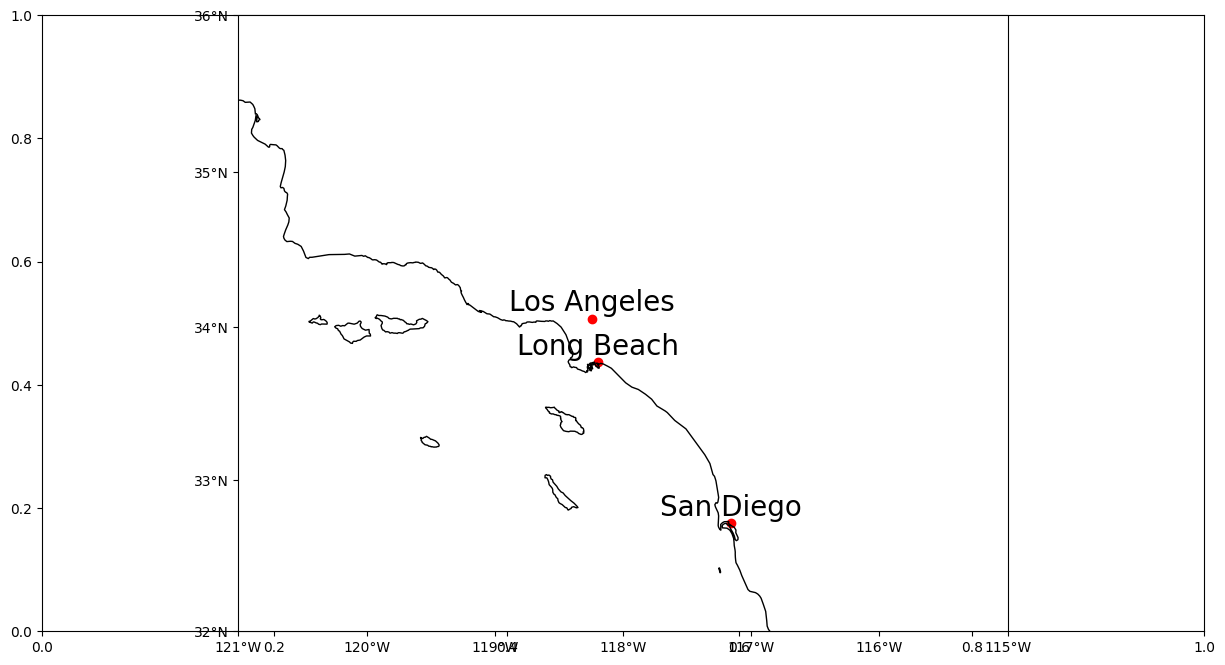

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')
ax.set_yticks([32,33,34,35,36], crs=ccrs.PlateCarree())
ax.set_xticks([-121,-120,-119,-118,-117,-116,-115], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-121,-115, 32, 36])
X = top_calif_cities['lon']
Y = top_calif_cities['lat']
cities = top_calif_cities['City']
ax.scatter(X,Y,color="red",marker="o", transform=ccrs.PlateCarree())
for i in X.index:
    label = cities[i]
    plt.text(X[i], Y[i]+0.05, label, clip_on=True, fontsize=20,
            horizontalalignment='center', transform=ccrs.Geodetic())
plt.show()